clean_text    0
category      0
dtype: int64

Accuracy Score: 0.5725900472479597

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.92      0.14      0.24      7152
         0.0       0.85      0.34      0.48     11067
         1.0       0.51      0.97      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.76      0.48      0.46     32594
weighted avg       0.72      0.57      0.51     32594



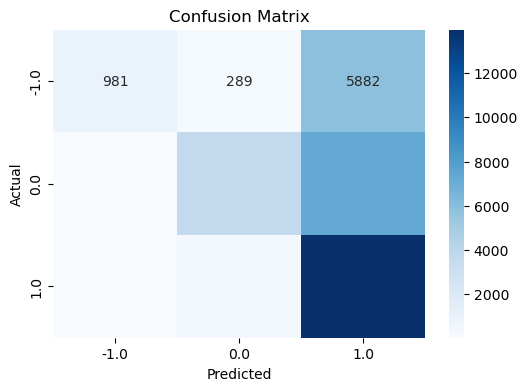

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\yashs\Downloads\python\DA Project\Task 4\Twitter_Data.csv")

df = df.dropna(subset=['clean_text', 'category'])

print(df.isnull().sum())

X = df['clean_text']  # Text data
y = df['category']    # Sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


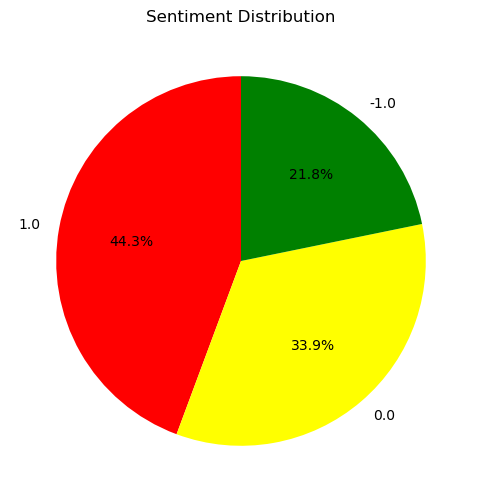

In [12]:
# Count of each sentiment
sentiment_counts = df['category'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow','green'])
plt.title("Sentiment Distribution")
plt.show()


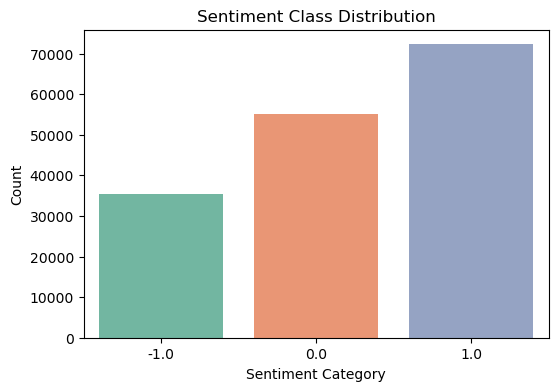

In [13]:
# Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, palette='Set2')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


In [14]:
df.to_csv("Cleaned_Twitter_Data.csv", index=False)
